In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df_train = pd.read_csv("C:/Users/I502159/Desktop/Machine_Learning/Dataset/Titanic/train.csv")
df_test = pd.read_csv("C:/Users/I502159/Desktop/Machine_Learning/Dataset/Titanic/test.csv")

In [97]:
titanic_data = [df_train , df_test]
titanic_data = pd.concat(titanic_data)

In [98]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
print(titanic_data['Embarked'].unique())
print(titanic_data['Parch'].unique())
print(titanic_data['SibSp'].unique())
print(titanic_data['Pclass'].unique())

['S' 'C' 'Q' nan]
[0 1 2 5 3 4 6 9]
[1 0 3 4 2 5 8]
[3 1 2]


In [100]:
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [101]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [103]:
survived = df_train[df_train['Survived']==1]
not_survived = df_train[df_train['Survived']==0]

In [104]:
#Pclass Vs Survived

In [105]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [106]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [107]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

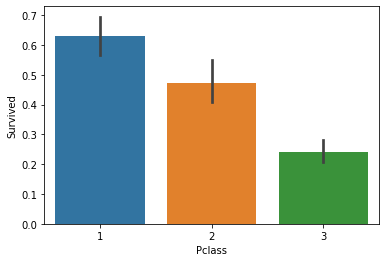

In [108]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

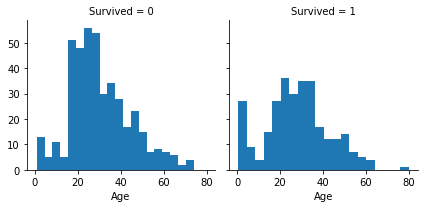

In [109]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\I502159\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


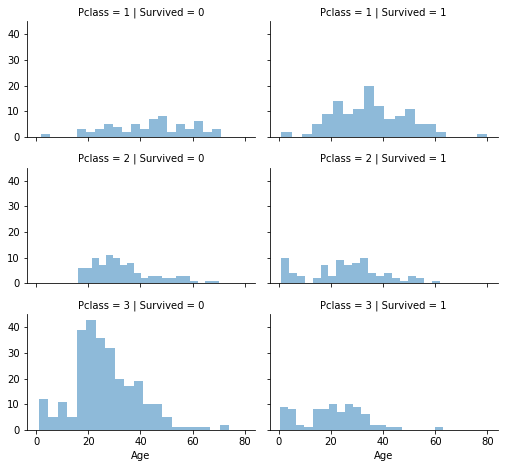

In [110]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [111]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [112]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [113]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

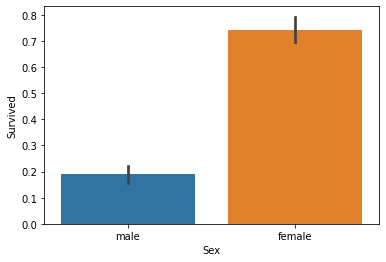

In [114]:
sns.barplot(x='Sex',y='Survived',data=df_train)

In [115]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Users\I502159\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\I502159\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\I502159\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


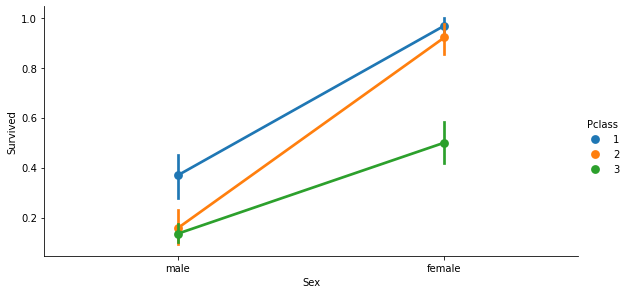

In [116]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df_train)

# From the above plot:

Women from 1st and 2nd Pclass have almost 100% survival chance.
Men from 2nd and 3rd Pclass have only around 10% survival chance.

In [117]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [118]:
df_train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [119]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

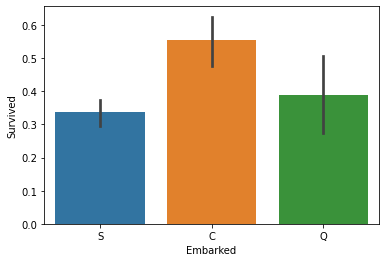

In [120]:
sns.barplot(x='Embarked',y='Survived',data=df_train)

In [121]:
df_train.groupby(['Embarked','Pclass','Survived']).Sex.value_counts()

Embarked  Pclass  Survived  Sex   
C         1       0         male       25
                            female      1
                  1         female     42
                            male       17
          2       0         male        8
                  1         female      7
                            male        2
          3       0         male       33
                            female      8
                  1         female     15
                            male       10
Q         1       0         male        1
                  1         female      1
          2       0         male        1
                  1         female      2
          3       0         male       36
                            female      9
                  1         female     24
                            male        3
S         1       0         male       51
                            female      2
                  1         female     46
                            male       28

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

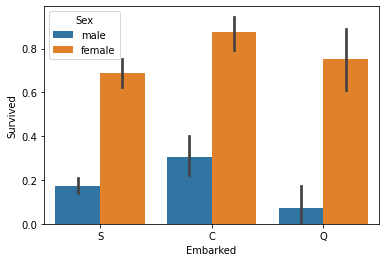

In [122]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df_train)

In [123]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [124]:
df_train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [125]:
df_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

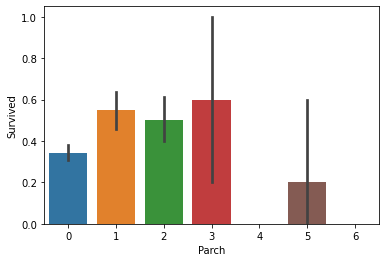

In [126]:
sns.barplot(x='Parch',y='Survived',data=df_train)

In [127]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [128]:
df_train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [129]:
df_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

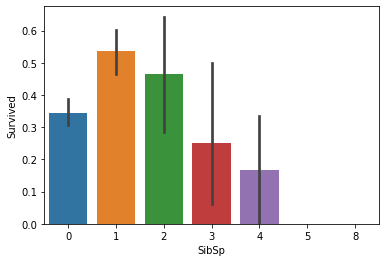

In [130]:
sns.barplot(x='SibSp',y='Survived',data=df_train)

<AxesSubplot:>

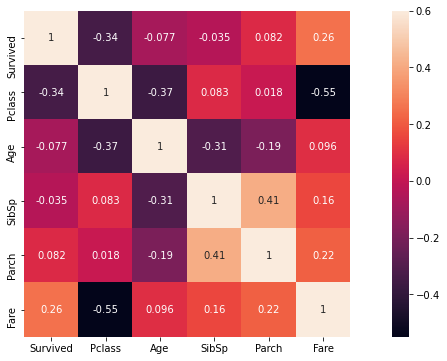

In [131]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)


In [132]:
train_test_data = [df_train, df_test]
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [133]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [134]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [135]:
for dataset in train_test_data:
    
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [136]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [137]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [138]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [140]:
df_train = df_train.drop(['Name', 'PassengerId','Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

In [141]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [142]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


In [143]:
df_train.Embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [144]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [146]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [147]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [148]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1.0
1,1,1,1,38.0,1,0,71.2833,1,3.0
2,1,3,1,26.0,0,0,7.9250,0,2.0
3,1,1,1,35.0,1,0,53.1000,0,3.0
4,0,3,0,35.0,0,0,8.0500,0,1.0


# HANDLE MISSING VALUE
Age Feature
We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).
We then create a new column named AgeBand. This categorizes age into 5 different age range.

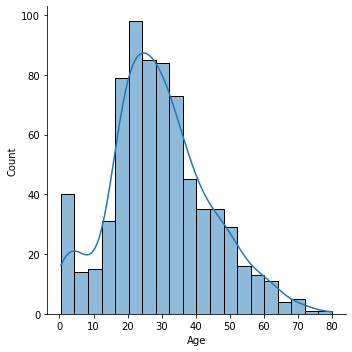

In [149]:
sns.displot(df_train['Age'],kde = True)

In [150]:
df_train['Age'].mean()

29.69911764705882

In [151]:
for dataset in combine:
    age_mean = dataset['Age'].mean()
    age_std =  dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_mean- age_std, age_mean + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

<ipython-input-151-0872ad603f74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [152]:
df_train['Age'].isnull().sum()

0

In [153]:
df_train['AgeBin'] = pd.cut(df_train['Age'], 5)


In [154]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,0,22,1,0,7.2500,0,1.0,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,1,3.0,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,0,2.0,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,0,3.0,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,0,1.0,"(32.0, 48.0]"


In [155]:
print (df_train[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean())

          AgeBin  Survived
0  (-0.08, 16.0]  0.504348
1   (16.0, 32.0]  0.352144
2   (32.0, 48.0]  0.383399
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [156]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [157]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,0,1,1,0,7.2500,0,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1.0,"(32.0, 48.0]"


In [158]:
df_train['Fare'].isnull().sum()

0

In [159]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

In [160]:
df_train['FareBin'] = pd.qcut(df_train['Fare'], 4)
print (df_train[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean())

           FareBin  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [161]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,0,1,1,0,7.2500,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,1,0,71.2833,1,3.0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,0,0,7.9250,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,1,0,53.1000,0,3.0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,0,0,8.0500,0,1.0,"(32.0, 48.0]","(7.91, 14.454]"


In [162]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [163]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,0,1,1,0,0,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,1,0,3,1,3.0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,0,0,1,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,1,0,3,0,3.0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,0,0,1,0,1.0,"(32.0, 48.0]","(7.91, 14.454]"


In [164]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1


In [165]:
print (df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


About data shows that:

Having FamilySize upto 4 (from 2 to 4) has better survival chance.
FamilySize = 1, i.e. travelling alone has less survival chance.
Large FamilySize (size of 5 and above) also have less survival chance.
Let's create a new feature named IsAlone. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

In [166]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [167]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,1,1,1,2,1,0,3,1,3.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,1,3,1,1,0,0,1,0,2.0,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,1,1,1,2,1,0,3,0,3.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,0,3,0,2,0,0,1,0,1.0,"(32.0, 48.0]","(7.91, 14.454]",1,1
5,0,3,0,2,0,0,1,2,1.0,"(32.0, 48.0]","(7.91, 14.454]",1,1
6,0,1,0,3,0,0,3,0,1.0,"(48.0, 64.0]","(31.0, 512.329]",1,1
7,0,3,0,0,3,1,2,0,4.0,"(-0.08, 16.0]","(14.454, 31.0]",5,0
8,1,3,1,1,0,2,1,0,3.0,"(16.0, 32.0]","(7.91, 14.454]",3,0
9,1,2,1,0,1,0,2,1,3.0,"(-0.08, 16.0]","(14.454, 31.0]",2,0


In [74]:
features_drop = ['SibSp', 'Parch','FamilySize']

In [75]:
df_train = df_train.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)

In [76]:
df_train = df_train.drop(['AgeBin', 'FareBin'], axis=1)

In [77]:
df_train.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1.0,0
1,1,1,1,2,3,1,3.0,0
2,1,3,1,1,1,0,2.0,1
3,1,1,1,2,3,0,3.0,0
4,0,3,0,2,1,0,1.0,1
5,0,3,0,1,1,2,1.0,1
6,0,1,0,3,3,0,1.0,1
7,0,3,0,0,2,0,4.0,0
8,1,3,1,1,1,0,3.0,0
9,1,2,1,0,2,1,3.0,0


In [78]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1.0,1
1,893,3,1,2,0,0,3.0,0
2,894,2,0,3,1,2,1.0,1
3,895,3,0,1,1,0,1.0,1
4,896,3,1,1,1,0,3.0,0


In [79]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

87.32


# ActualPositiveActualNegativePredictedPositiveTPFPPredictedNegativeFNTN 
In our (Titanic problem) case:

True Positive: The classifier predicted Survived and the passenger actually Survived.

True Negative: The classifier predicted Not Survived and the passenger actually Not Survived.

False Postiive: The classifier predicted Survived but the passenger actually Not Survived.

False Negative: The classifier predicted Not Survived but the passenger actually Survived.

Accuracy: 87 % 

Confusion Matrix in Numbers
[[505  44]
 [ 69 273]]
Confusion Matrix in Percentage
[[0.92 0.08]
 [0.2  0.8 ]]



<AxesSubplot:>

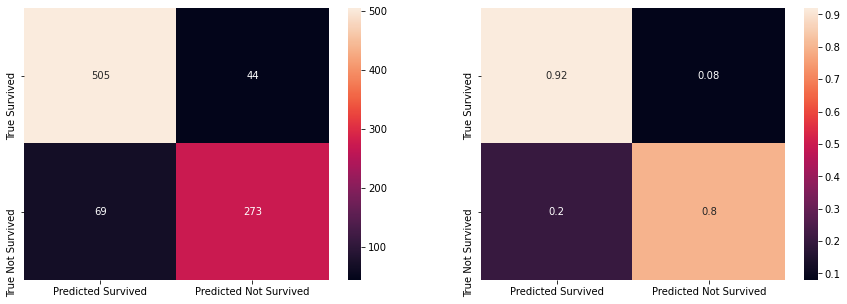

In [82]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [83]:
#submission = pd.DataFrame({
 #       "PassengerId": df_test["PassengerId"],
  #      "Survived": y_pred_random_forest
   # })



In [84]:
 #submission.to_csv('submission.csv', index=False)

In [86]:
import pickle

file = open('Titanic-Notebook.pkl','wb')
pickle.dump(clf,file)

In [88]:
clf.predict([[1,1,2,3,0,3.0,0]])

array([1], dtype=int64)